In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [17]:
census = pd.read_csv('../data/demographic_census.csv')
voting_turnout = pd.read_excel('../data/2018-turnout-population-congress-districts.xlsx')
voting_age = pd.read_excel('../data/2018-age-population-congress-districts.xlsx')
voting_ed = pd.read_excel('../data/2018-education-population-congress-districts.xlsx')
voting_sex_poverty = pd.read_excel('../data/2018-sex-poverty-population-congress-districts.xlsx')
voting_race = pd.read_excel('../data/2018-race-population-congress-districts.xlsx')

In [3]:
census.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error"
0,01000US,United States,322903030,0,265385095,1661,197181177,8728,39715917,36196,...,57616,2769,15035465,85121,2730042,42504,1288890,25037,1441152,21598
1,50000US0101,"Congressional District 1, AL",706503,673,683855,695,459898,588,193875,811,...,0,28,5535,1033,1356,465,571,219,785,426
2,50000US0102,"Congressional District 2, AL",680575,1719,656410,1727,420590,1014,211747,1886,...,49,43,5964,850,1075,293,503,170,572,244
3,50000US0103,"Congressional District 3, AL",706705,1347,684817,1326,478120,1098,179170,1402,...,18,30,5356,806,1305,366,806,252,499,267
4,50000US0104,"Congressional District 4, AL",683391,2079,639036,2033,571190,1863,47200,891,...,525,514,14257,1467,1498,370,782,262,716,231


In [4]:
census.shape

(441, 44)

In [12]:
voting_turnout.head()

,"Table 1. Number of Votes Cast, Citizen Voting-Age Population and Voting Rates for Congressional Districts: 2018",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,"[Table with column headings in rows 3 and 4, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Line #,State abbreviation,State name,Congressional district,Votes cast for congressional representative fo...,Citizen voting- age population2,NaN,Voting rate3,NaN
2,NaN,NaN,NaN,NaN,NaN,Estimate,Margin of error (MOE),Estimate,Margin of error (MOE)
3,1,AL,Alabama,1,242617,544464,3424,44.5607,0.280231
4,2,AL,Alabama,2,226230,516295,5674,43.818,0.481553


In [13]:
voting_age.head()

,Table 2A. Characteristics (Age) of the Citizen Voting-Age Population for Congressional Districts: 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,"[Table with column headings in rows 3, 4, and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population,NaN,Age,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,18-29 years old,NaN,NaN,NaN,...,NaN,NaN,45-64 years old,NaN,NaN,NaN,65 years old and older,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Estimate,Margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),...,Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE)
4,1,AL,Alabama,1,544464,3424,104060,2412,19.1,0.4,...,23.1,0.5,188031,3186,34.5,0.5,126473,1797,23.2,0.3


In [18]:
voting_ed.head()

,Table 2C. Characteristics (Educational Attainment) of the Citizen Voting-Age Population for Congressional Districts: 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,"[Table with column headings in rows 3, 4, and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population,NaN,Educational attainment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Less than 9th grade,NaN,NaN,NaN,...,NaN,NaN,High school or more,NaN,NaN,NaN,Bachelor's degree or more,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Estimate,Margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),...,Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE)
4,1,AL,Alabama,1,544464,3424,13409,1845,2.5,0.3,...,7.4,0.7,473821,5794,87,0.9,123479,5614,22.7,1.1


In [19]:
voting_sex_poverty.head()

,Table 2B. Characteristics (Sex and Poverty) of the Citizen Voting-Age Population for Congressional Districts: 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,"[Table with column headings in rows 3, 4, and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population,NaN,Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poverty,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN,NaN,NaN,Women,NaN,NaN,NaN,Poverty universe1,Poverty universe margin of error (MOE),Below poverty level,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Estimate,Margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),NaN,NaN,Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE)
4,1,AL,Alabama,1,544464,3424,256603,2312,47.1,0.3,287861,2175,52.9,0.3,532906,4244,76483,6772,14.4,1.3


In [20]:
voting_race.head()

,Table 2D. Characteristics (Race and Hispanic Origin) of the Citizen Voting-Age Population for Congressional Districts: 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,"[Table with column headings in rows 3, 4, and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population,NaN,Race and Hispanic Origin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,...,NaN,NaN,Hispanic,NaN,NaN,NaN,White non-Hispanic,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Estimate,Margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),...,Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE),Estimate,Margin of error (MOE),Percent of total,Percent of total margin of error (MOE)
4,1,AL,Alabama,1,544464,3424,379018,2294,69.6,0.4,...,1.34536,0.57554,11678,1192,2.1,0.2,370443,1879,68,0.4


In [3]:
alabama112 = gpd.read_file('../data/congressional-district-boundaries/Alabama_108_to_112.geojson')

In [5]:
alabama112

,startcong,district,statename,member,endcong,id,geometry
0,108,1,Alabama,"{'112': {'20300': {'party': 'Republican', 'nam...",112,001108112001,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,108,2,Alabama,"{'112': {'21192': {'party': 'Republican', 'nam...",112,001108112002,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,108,3,Alabama,"{'112': {'20301': {'party': 'Republican', 'nam...",112,001108112003,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,108,4,Alabama,"{'112': {'29701': {'party': 'Republican', 'nam...",112,001108112004,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,108,5,Alabama,"{'112': {'21193': {'party': 'Republican', 'nam...",112,001108112005,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."
5,108,6,Alabama,"{'112': {'29301': {'party': 'Republican', 'nam...",112,001108112006,"MULTIPOLYGON (((-86.96219 33.45121, -86.96431 ..."
6,108,7,Alabama,"{'112': {'21102': {'party': 'Democrat', 'name'...",112,001108112007,"MULTIPOLYGON (((-87.31454 33.21817, -87.31514 ..."


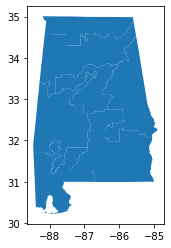

In [6]:
alabama112.plot();

import os, json
#import pandas as pd

# this finds our json files
path_to_json = 'json/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

# here I define my pandas Dataframe with the columns I want to get from the json
jsons_data = pd.DataFrame(columns=['country', 'city', 'long/lat'])

# we need both the json and an index number so use enumerate()
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        # here you need to know the layout of your json and each json has to have
        # the same structure (obviously not the structure I have here)
        country = json_text['features'][0]['properties']['country']
        city = json_text['features'][0]['properties']['name']
        lonlat = json_text['features'][0]['geometry']['coordinates']
        # here I push a list of data into a pandas DataFrame at row given by 'index'
        jsons_data.loc[index] = [country, city, lonlat]

# now that we have the pertinent json data in our DataFrame let's look at it
print(jsons_data)